In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("train_u6lujuX_CVtuZ9i.csv") 
test = pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
train_original = train.copy() 
test_original = test.copy()

### Let's look at features in our dataset now.

In [4]:
train.shape

(614, 13)

In [5]:
test.shape

(367, 12)

In [6]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

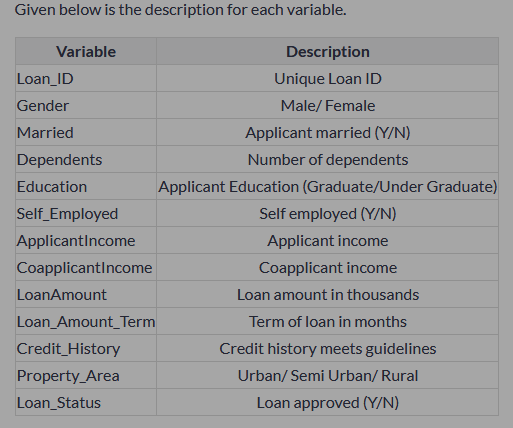

In [7]:
from IPython.display import Image
Image("Dataset_Desc.png")

In [8]:
train.dtypes
#OBject datatypes represents Categorical variables in our dataset

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Object format means variables are categorical. Categorical variables in our dataset are: Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status

### Univariate Analysis
This means to analyze each variable individually.
Let's look at Target variable first and it's frequency in our dataset.

In [9]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [10]:
train['Loan_Status'].value_counts(normalize=True)
#Prints percentage instead of numbers

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

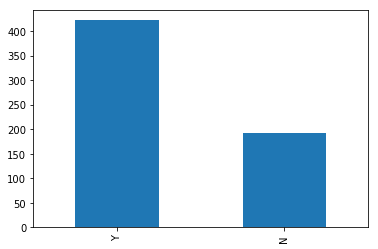

In [11]:
train['Loan_Status'].value_counts().plot.bar()
plt.show()

Categorical features: These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status)

Ordinal features: Variables in categorical features having some order involved (Dependents, Education, Property_Area)

Numerical features: These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)

### Let's visualize categorical and Ordinal features first!

In [12]:
plt.figure(1) 
plt.subplot(221) 

In [13]:
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')
plt.subplot(222)

In [14]:
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married')
plt.subplot(223)

In [15]:
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.subplot(224)

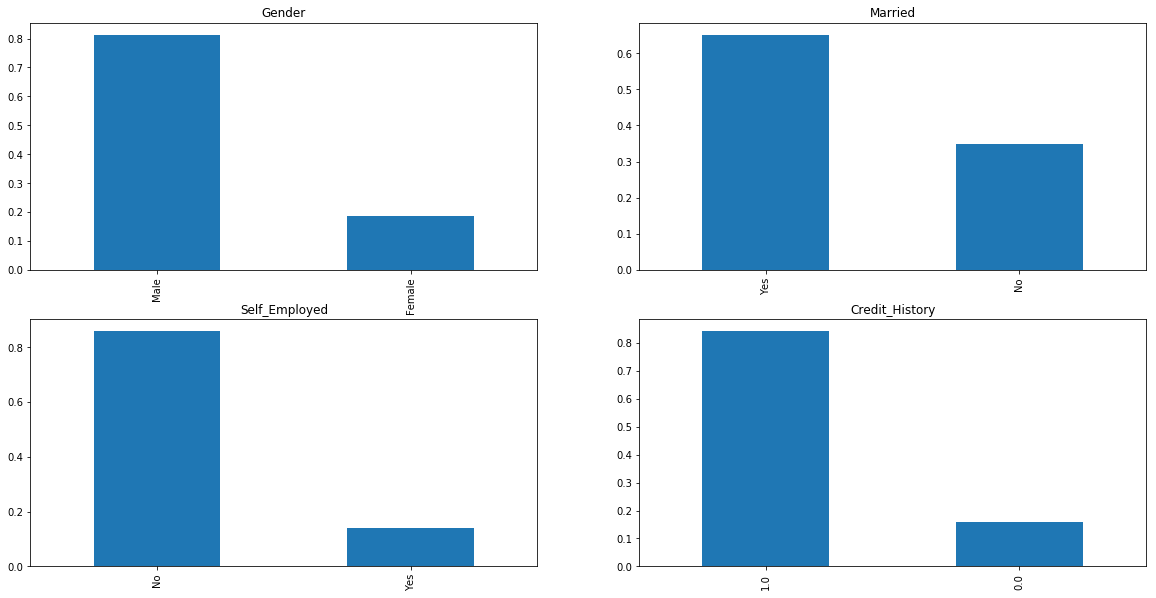

In [16]:
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 
plt.show()

#### Let's draw some conclusions from above visuals:
1) 80% of loan applicants are Male <br>
2) About 65% of loan applicants are Married <br>
3) More than 80% of loan applicants are NOT self Employed <br>
4) Almost 80% of loan applicants have some earlier credit history <br>

In [17]:
plt.figure(1)
plt.subplot(131)

In [18]:
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Dependents')
plt.subplot(132)

In [19]:
train['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.subplot(133)

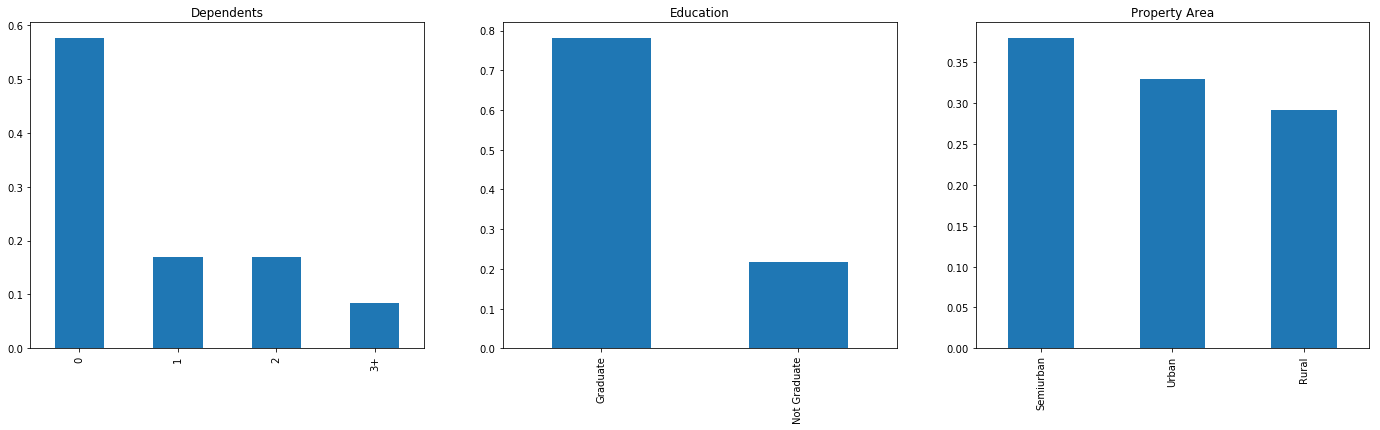

In [20]:
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property Area')
plt.show()

#### Let's draw some conclusions from above visuals:
1) Almost 60% of loan applicants are independent <br>
2) Almost 80% of loan applicants have completed their graduation <br>
3) Most of loan applicants are from Semi-Urban areas followed by Urban and Rural Areas.

Till now we have seen the categorical and ordinal variables and now lets visualize the numerical variables. Lets look at the distribution of Applicant income first.

In [21]:
plt.figure(1)
plt.subplot(121)

In [22]:
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)

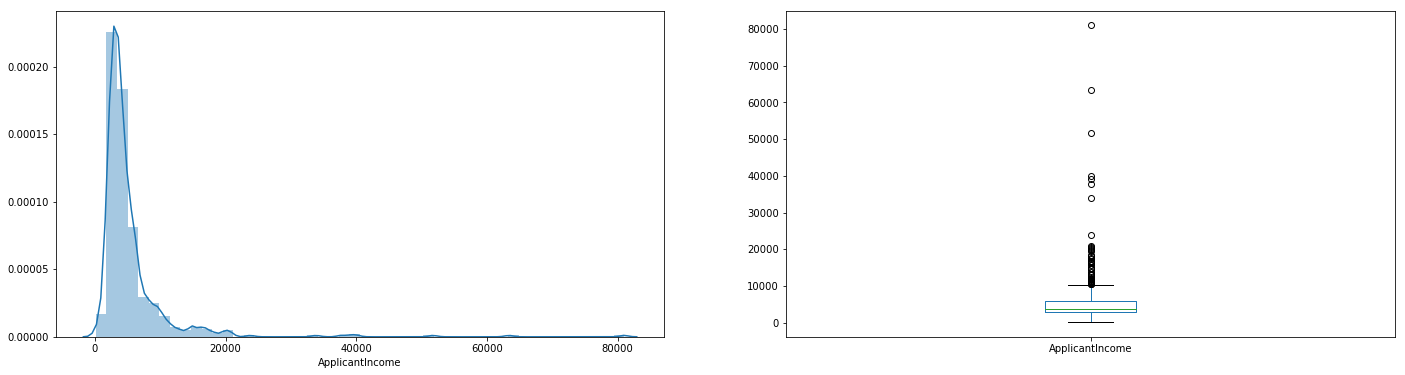

In [23]:
train['ApplicantIncome'].plot.box(figsize=(24,6))
plt.show()

###### As we can observe, the income is skewed towards left which means it is not normally distributed. 
###### The Box Plot confirms presence of some outliers in our dataset.

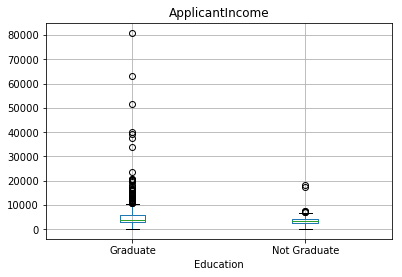

In [24]:
train.boxplot(column='ApplicantIncome',by='Education')
plt.suptitle("")
plt.show()

##### We can see that there are a higher number of graduates with very high incomes, which are appearing to be the outliers

Let's look at Loan Amount Variable

In [25]:
plt.figure(1)
plt.subplot(121)
df = train.dropna()

In [26]:
sns.distplot(df['LoanAmount'])
plt.subplot(122)

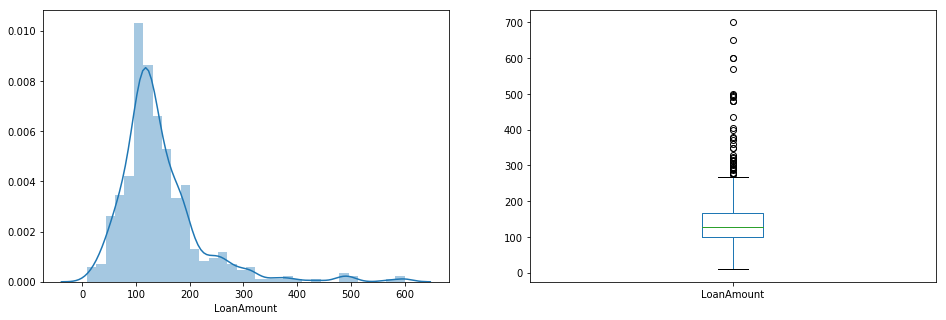

In [27]:
train['LoanAmount'].plot.box(figsize=(16,5)) 
plt.show()

### Bivariate Analysis
This means to analyze each variable with respect to target variable.

In [28]:
gender = pd.crosstab(train['Gender'],train['Loan_Status'])
gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


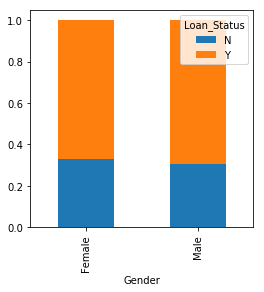

In [29]:
gender.div(gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

It can be inferred that the proportion of male and female applicants is more or less same for both approved and unapproved loans.

In [30]:
Married=pd.crosstab(train['Married'],train['Loan_Status']) 
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status']) 
Education=pd.crosstab(train['Education'],train['Loan_Status']) 
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status']) 

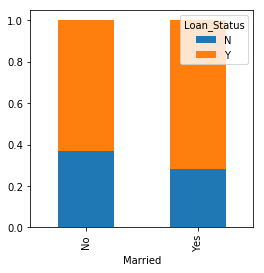

In [31]:
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Proportion of married applicants is higher for the approved loans.

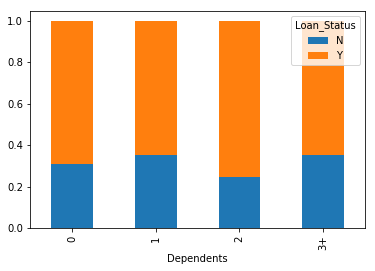

In [32]:
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show()

Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.

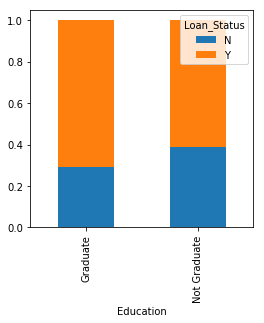

In [33]:
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 

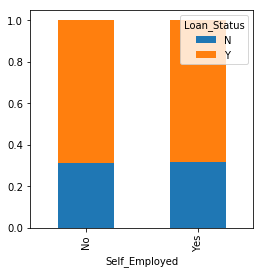

In [34]:
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

In [35]:
credit_history = pd.crosstab(train['Credit_History'],train['Loan_Status'])

In [36]:
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])

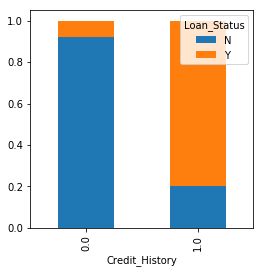

In [37]:
credit_history.div(credit_history.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

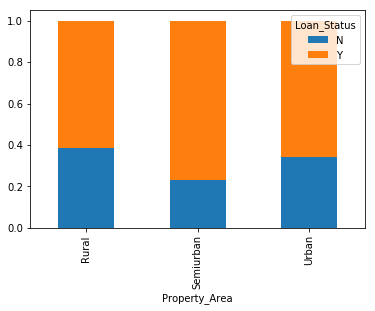

In [38]:
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.show()

#### Let's draw some conclusions from above visuals:
1) It seems people with credit history as 1 are more likely to get their loans approved. <br>
2) Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas. <br>

### Missing values and Outlier treatment!

In [40]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We can consider these methods to fill the missing values:

    For numerical variables: imputation using mean or median
    For categorical variables: imputation using mode

In [41]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)

In [42]:
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [43]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

360 is most frequent value in Loan Amount Term Coloumn

In [45]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [50]:
#Median is used because of Numerical variable type
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [49]:
#Missing Data does not exist now!
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Let's fill missing values in test dataset too!

In [51]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True) 
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True) 
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer. This is called right skewness. One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values. So, we get a distribution similar to normal distribution.

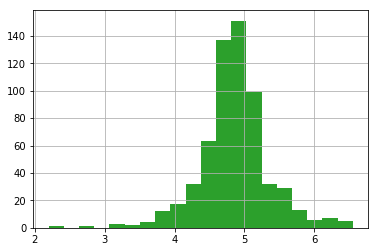

In [54]:
train['LoanAmount_log'] = np.log(train['LoanAmount']) 
test['LoanAmount_log'] = np.log(test['LoanAmount'])
train['LoanAmount_log'].hist(bins=20) 
plt.show()

## Model Building : Logistic Regression

Let's drop LoanID, as it does not affect our output

In [55]:
train = train.drop('Loan_ID',axis=1)
test = test.drop('Loan_ID',axis=1)

In [57]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status

Now we will make dummy variables for the categorical variables. Dummy variable turns categorical variables into a series of 0 and 1, making them lot easier to quantify and compare. Let us understand the process of dummies first:

    Consider the “Gender” variable. It has two classes, Male and Female.
    As logistic regression takes only the numerical values as input, we have to change male and female into numerical value.
    Once we apply dummies to this variable, it will convert the “Gender” variable into two variables(Gender_Male and Gender_Female), one for each class, i.e. Male and Female.
    Gender_Male will have a value of 0 if the gender is Female and a value of 1 if the gender is Male.

In [58]:
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv = train_test_split(X,y,test_size=0.3)

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(random_state=1)

In [66]:
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Here the C parameter represents inverse of regularization strength. Regularization is applying a penalty to increasing the magnitude of parameter values in order to reduce overfitting. Smaller values of C specify stronger regularization.

In [67]:
pred_cv = model.predict(x_cv)

In [68]:
accuracy_score(y_cv,pred_cv) * 100

75.675675675675677

In [69]:
pred_test = model.predict(test)

Lets import the submission file which we have to submit on the solution checker.

In [72]:
submission = pd.read_csv("Sample_Submission_ZAuTl8O_FK3zQHh.csv")
submission.head()

,Loan_ID,Loan_Status


In [73]:
submission['Loan_Status'] = pred_test

In [74]:
submission['Loan_ID']=test_original['Loan_ID']

##### Let's see our submission file after feeding predicted values to it.

Remember we need predictions in Y and N. So let’s convert 1 and 0 to Y and N.

In [80]:
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [81]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


Finally we will convert the submission to .csv format and make submission to check the accuracy on the leaderboard.

In [82]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')

### Cross Validation in our Model!

In this section we will learn about stratified k-fold cross validation. Let us understand how it works:

    Stratification is the process of rearranging the data so as to ensure that each fold is a good representative of the whole.
    
    For example, in a binary classification problem where each class comprises of 50% of the data, it is best to arrange the data such that in every fold, each class comprises of about half the instances.
    
    It is generally a better approach when dealing with both bias and variance.
    A randomly selected fold might not adequately represent the minor class, particularly in cases where there is a huge class imbalance.

In [83]:
from sklearn.model_selection import StratifiedKFold

In [84]:
i = 1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)

In [86]:
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr) 
    
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('Accuracy_score : ',score * 100)
    i+=1
    
    pred_test = model.predict(test)
    pred= model.predict_proba(xvl)[:,1]


6 of kfold 5
Accuracy_score :  79.8387096774

7 of kfold 5
Accuracy_score :  83.064516129

8 of kfold 5
Accuracy_score :  81.1475409836

9 of kfold 5
Accuracy_score :  79.5081967213

10 of kfold 5
Accuracy_score :  82.7868852459


## Model Building Part 2

We will try to improve the accuracy by tuning the hyperparameters for this model. We will use grid search to get the optimized values of hyper parameters. Grid-search is a way to select the best of a family of hyper parameters, parametrized by a grid of parameters.

We will tune the max_depth and n_estimators parameters. max_depth decides the maximum depth of the tree and n_estimators decides the number of trees that will be used in random forest model.

In [90]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [91]:
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}

In [95]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=1,n_jobs=-1),paramgrid)

In [93]:
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3, random_state=1)

In [101]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161, 181], 'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [104]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=41, n_jobs=-1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

So, the optimized value for the max_depth variable is 3 and for n_estimator is 41. Now let’s build the model using these optimized values.

In [105]:
i = 1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)

In [106]:
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=41)
    model.fit(xtr, ytr) 
    
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('Accuracy_score : ',score * 100)
    i+=1
    
    pred_test = model.predict(test)
    pred= model.predict_proba(xvl)[:,1]


1 of kfold 5
Accuracy_score :  79.8387096774

2 of kfold 5
Accuracy_score :  83.064516129

3 of kfold 5
Accuracy_score :  80.3278688525

4 of kfold 5
Accuracy_score :  78.6885245902

5 of kfold 5
Accuracy_score :  82.7868852459


### Getting most important features

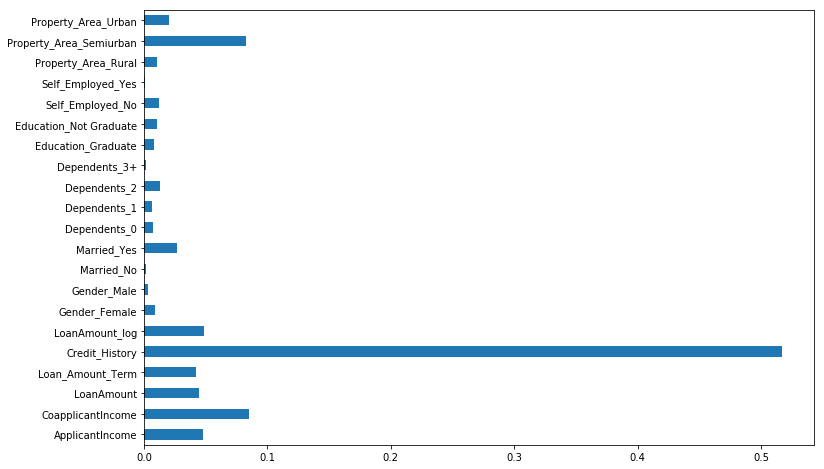

In [108]:
importances=pd.Series(model.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12,8))
plt.show()